# Prática Limiarização

**Aluno:** Euler Gomes da Rocha

Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.color import rgb2gray
from skimage.util import img_as_float
from skimage.filters import (
    threshold_otsu,
    threshold_local,
)

## Carregando a imagem RGB

(533, 800, 3)


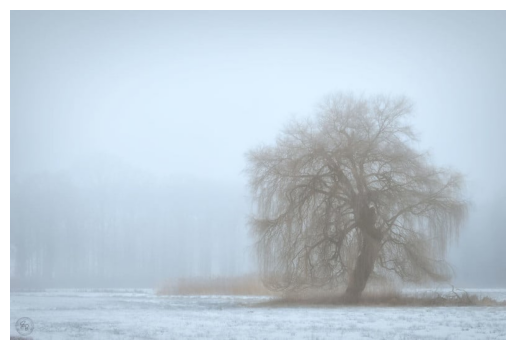

In [2]:
color_img = io.imread('low_contrast.jpg')
print(color_img.shape)

plt.figure()
plt.imshow(color_img)
plt.axis('off')
plt.show()


## Processamento da imagem com os filtros

In [3]:
print(color_img.ndim)

#converte para cinza
gray_img = color.rgb2gray(color_img)
#converte para float
float_img = img_as_float(gray_img)

3


## Limiarização

In [4]:
#global
thresh_global_manual = np.mean(float_img)
binary_global_manual = float_img > thresh_global_manual

In [5]:
#local
block_size = 51
offset = 0.02
thresh_local = threshold_local(float_img, block_size, offset=offset)
binary_local = float_img > thresh_local

In [6]:
#otsu
thresh_otsu = threshold_otsu(float_img)
binary_otsu = float_img > thresh_otsu

## Mostrando as imagens

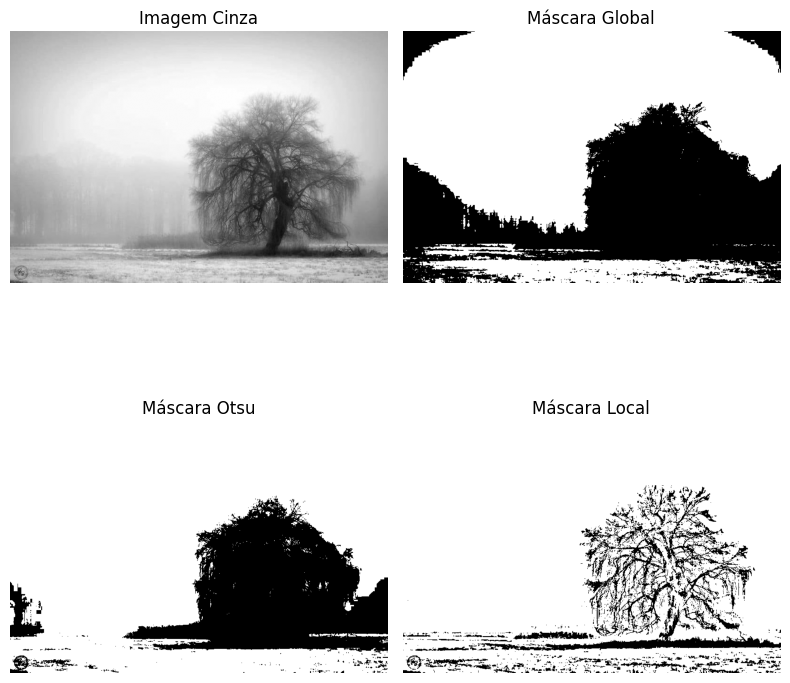

In [16]:
plt.figure(figsize=(8, 9))

plt.subplot(2, 2, 1)
plt.imshow(float_img, cmap='gray')
plt.title('Imagem Cinza')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(binary_global_manual, cmap='gray')
plt.title('Máscara Global')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(binary_otsu, cmap='gray')
plt.title('Máscara Otsu')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(binary_local, cmap='gray')
plt.title('Máscara Local')
plt.axis('off')

plt.tight_layout()
plt.show()


## Resultados
Ao obter os resultados, podemos observar que a máscara local foi a que obteve o melhor resultado, pois essa técnica calcula um limiar diferente para cada pequena região da imagem, se adaptando as diferentes tipos de iluminação da imagem.

Por se tratar de uma imagem com desfoque, a máscara global e a máscara Otsu misturaram parte do fundo com o objeto principal a ser destacado, pois como o proprio nome da técnica diz, elas definem um limiar global para toda a imagem, o que pode não funcionar em todas as areas da imagem se possuir diferentes iluminações.